In [115]:
!dir
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import skimage
from skimage.color import rgb2gray
from skimage.morphology import disk, square, rectangle as rect

from skimage.morphology import(binary_erosion, 
                               binary_dilation,
                               binary_closing,
                               skeletonize,
                               thin
                              )
from skimage.measure import find_contours

from skimage.draw import rectangle
from skimage.draw import rectangle_perimeter
from skimage.filters import threshold_otsu


 Volume in drive C has no label.
 Volume Serial Number is B4DA-B24E

 Directory of C:\Users\mohammed\projects\music-notes-reader

12/14/2020  09:30 AM    <DIR>          .
12/14/2020  09:30 AM    <DIR>          ..
12/05/2020  03:47 PM             1,928 .gitignore
12/05/2020  04:50 PM    <DIR>          .ipynb_checkpoints
12/13/2020  07:54 PM             3,115 commonfunctions.py
12/13/2020  10:35 PM    <DIR>          images
12/14/2020  09:30 AM           199,550 part1.ipynb
12/05/2020  03:47 PM             1,110 README.md
12/05/2020  03:47 PM           514,072 [IP] Project F2020_ Sheet Music Reader.pdf
12/13/2020  08:00 PM    <DIR>          __pycache__
               5 File(s)        719,775 bytes
               5 Dir(s)  302,711,779,328 bytes free


In [67]:
# common functions

def get_bounding_boxes(img,box_aspect_ratio):
    """
    summary: this function returns
    parameter:
    img: is a binary image for which to find the contours 
    aspect_ratio: is a tuple where (low_aspect_ratio,high_aspect_ratio)
    """
    contours = find_contours(img,.8)
    bounding_boxes=[]
    for contour in contours:
        Xmin= np.min(contour[:,1])
        Xmax=np.max(contour[:,1]) 
        Ymin=np.min(contour[:,0])
        Ymax = np.max(contour[:,0])
        aspect_ratio = (Xmax-Xmin)/(Ymax-Ymin)
    #     aspect_ratio=1/aspect_ratio
        if aspect_ratio >= box_aspect_ratio[0] and aspect_ratio <= box_aspect_ratio[1]:
            bounding_boxes.append([Xmin,Xmax,Ymin,Ymax])
        
    return bounding_boxes
def get_bounded_image(img,bounding_boxes):
    conte = np.zeros(img.shape)
    for box in bounding_boxes:
        [Xmin, Xmax, Ymin, Ymax] = box
        rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=closed_card2.shape)
        rr = rr.astype(np.int)
        cc= cc.astype(np.int)
        conte[rr, cc] = 1 #set color white
    img2 = np.where(conte==1, img, 0)
    return img2
def draw_bounding_boxes(img,bounding_boxes):
    conte = np.zeros(img.shape)
    for box in bounding_boxes:
        [Xmin, Xmax, Ymin, Ymax] = box
        rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=closed_card2.shape)
        rr = rr.astype(np.int)
        cc= cc.astype(np.int)
        conte[rr, cc] = 1 #set color white
    img2 = np.where(conte==1, img, 0)
    show_images([conte,img2], ['bounding_boxes','original segmented'])

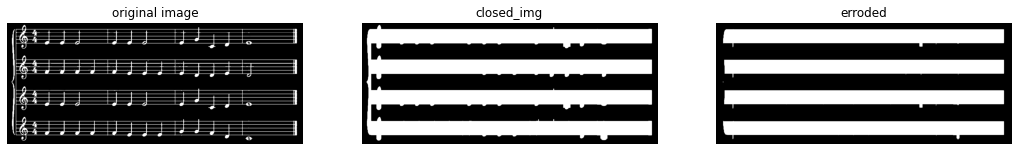

In [65]:
original_image = io.imread('images/music1.JPG')
gray_image = rgb2gray(original_image)
binary_image = binarize(gray_image)
inverted_image = 255 - binary_image
rows=17
cols=20
selem = rect(rows,cols)
closed_img = binary_closing(inverted_image,selem=selem)

selem = rect(3,20)
erroded_img = binary_erosion(closed_img,selem=selem)
show_images([inverted_image,closed_img,erroded_img],['original image','closed_img','erroded'])

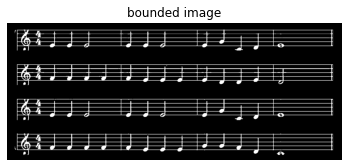

In [102]:
## let's find the contours
#When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
# print(bounding_boxes)
bounding_boxes = get_bounding_boxes(erroded_img,(4,4000))
# draw_bounding_boxes(inverted_image,bounding_boxes)
bounded_image = get_bounded_image(inverted_image, bounding_boxes)
show_images([bounded_image],['bounded image'])

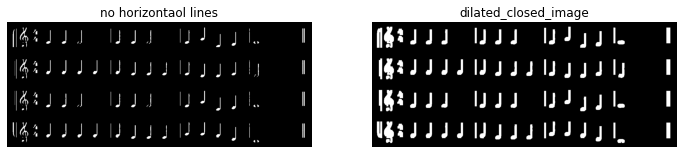

In [117]:
# let's remove thin horizontal lines
rows=5
cols=1
selem = rect(rows,cols)
no_horiz_line_image = binary_erosion(bounded_image,selem=selem)
rows=10
cols=10
selem = rect(rows,cols)
dilated_closed_image = binary_dilation(binary_closing(no_horiz_line_image,selem=selem),selem=selem)
dilated_closed_image = binary_erosion(dilated_closed_image, rect(3,3))
show_images([no_horiz_line_image,dilated_closed_image],['no horizontaol lines','dilated_closed_image'])


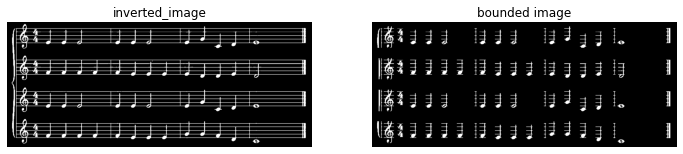

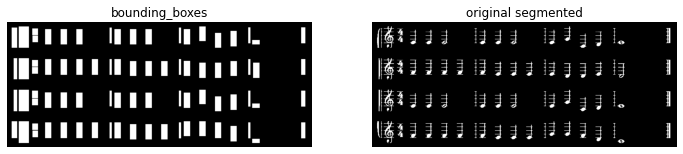

In [118]:
# let's get the bounding boxes for the individual symbols
bounding_boxes = get_bounding_boxes(dilated_closed_image,(0,4000))
# draw_bounding_boxes(inverted_image,bounding_boxes)
bounded_image = get_bounded_image(inverted_image, bounding_boxes)
show_images([inverted_image,bounded_image],['inverted_image','bounded image'])
draw_bounding_boxes(bounded_image,bounding_boxes)